<h3 style= "color:#4682B4;"> 📚 Libraries</h3>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats.contingency import association
%matplotlib inline
pd.set_option('display.max_columns', None)

<h3 style="color: #4682B4;">💾 Data Loading</h3>

In [69]:
price_df = pd.read_csv('asset_price_data.csv')

In [70]:
weights_df = pd.read_csv("portfolio_weights.csv")

In [71]:
information_df = pd.read_csv("asset_information_data.csv")

<h3 style="color: #4682B4;">📊 Exercise 1: Price Charting</h3>

- You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

- Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [72]:
# putting date as index 
price_df['date'] = pd.to_datetime(price_df['date'])
price_df.set_index('date', inplace=True)

In [73]:
# normalizing all the asset prices 
df_price_normalized = round(price_df / price_df.iloc[0] * 100, 2)

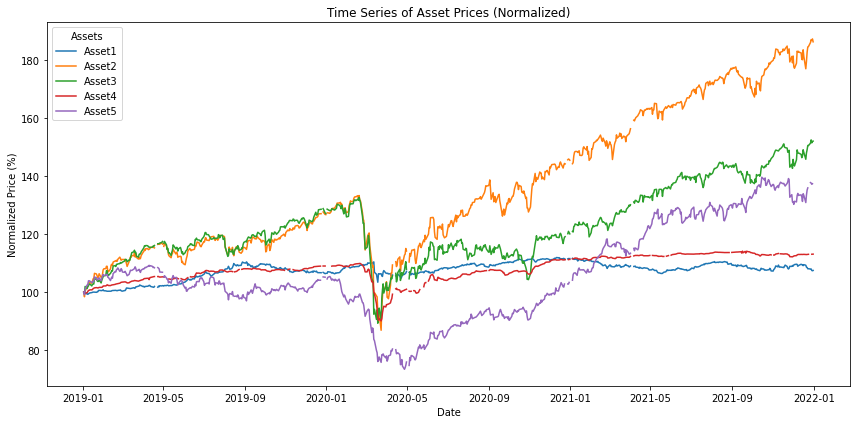

In [74]:
# Plotting the time series data
plt.figure(figsize=(12, 6))

for column in df_price_normalized.columns:
    plt.plot(df_price_normalized.index, df_price_normalized[column], label=column)

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Normalized Price (%)")
plt.title("Time Series of Asset Prices (Normalized)")
plt.legend(title="Assets")
plt.tight_layout()

# Display the plot
plt.show()

<h3 style="color: #4682B4;">📊 Exercise 2: Daily Percentage Returns</h3>

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

In [75]:
# calculate the daily percentage returns for each financial asset
returns = df_price_normalized.pct_change()

In [76]:
returns

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002000,-0.016100,-0.005700,-0.002700,-0.009400
2019-01-04,-0.002806,0.020937,0.025244,-0.001103,0.019180
2019-01-07,-0.001507,0.012643,-0.007357,0.001807,0.014857
2019-01-08,-0.001510,0.001081,0.007115,0.003607,-0.000195
...,...,...,...,...,...
2021-12-27,-0.000925,0.007364,0.005447,0.000000,0.013462
2021-12-28,0.000093,0.005482,0.007598,0.000000,-0.001161
2021-12-29,-0.004817,-0.001604,-0.006623,0.000177,-0.003125


In [77]:
#Calculate the correlation matrix for the five assets.
correlation = price_df.corr()
correlation

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,0.503582,0.369884,0.568286,0.071569
Asset2,0.503582,1.000000,0.907379,0.879826,0.830544
Asset3,0.369884,0.907379,1.000000,0.878428,0.869340
Asset4,0.568286,0.879826,0.878428,1.000000,0.779235
Asset5,0.071569,0.830544,0.869340,0.779235,1.000000


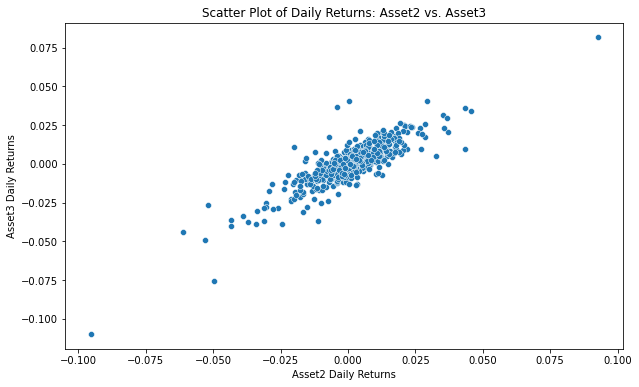

In [78]:
# Create a scatter plot comparing the returns of two specific assets.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=returns['Asset2'], y=returns['Asset3'])
plt.xlabel('Asset2 Daily Returns')
plt.ylabel('Asset3 Daily Returns')
plt.title('Scatter Plot of Daily Returns: Asset2 vs. Asset3')
plt.show()

<h3 style="color: #4682B4;">📊 Exercise 3: Portfolio Analysis</h3>

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [80]:
weights_df['date'] = pd.to_datetime(weights_df['date'])  # Ensure date is in datetime format
weights_df = weights_df.set_index('date')

In [82]:
# Align data by common dates
common_dates = returns.index.intersection(weights_df.index)
returns = returns.loc[common_dates]
weights_df = weights_df.loc[common_dates]

In [84]:
returns = returns.fillna(0)  # Replace NaNs with 0, or try returns = returns.fillna(method='ffill')

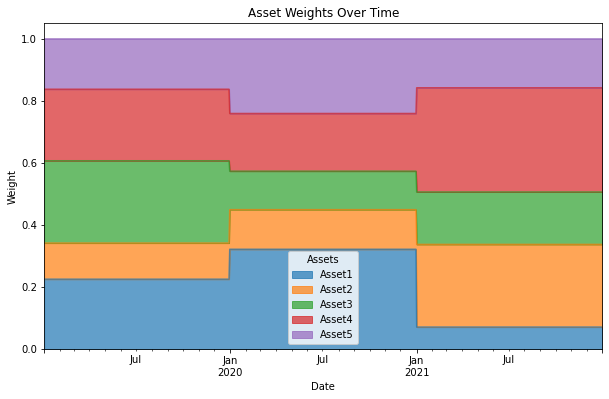

In [87]:
plt.figure(figsize=(10, 6))
weights_df.plot.area(alpha=0.7, ax=plt.gca())
plt.title('Asset Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend(title='Assets')
plt.show()

In [101]:
#Plot the historical cumulative returns of the portfolio.
portfolio = (returns * weights_df).sum(axis=1)
cumulative = (1 + portfolio).cumprod()

<function matplotlib.pyplot.show(close=None, block=None)>

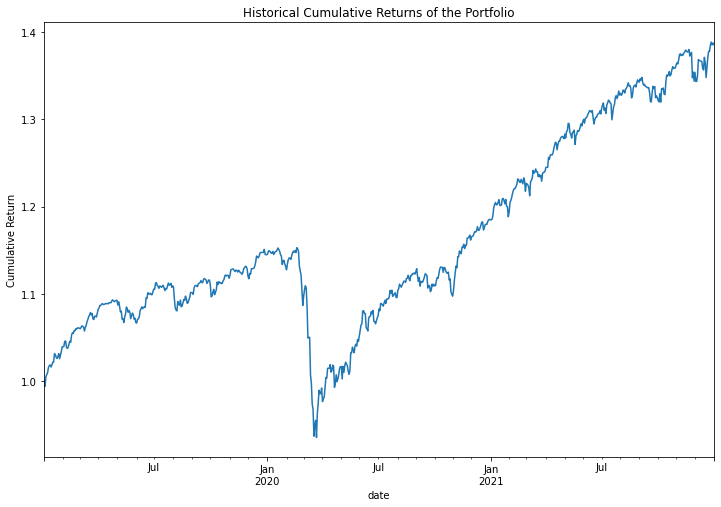

In [102]:
plt.figure(figsize=(12, 8))
cumulative.plot()
plt.title('Historical Cumulative Returns of the Portfolio')
plt.ylabel('Cumulative Return')
plt.show

In [100]:
#Calculate the annualized return of the portfolio.

cumulative.index = pd.to_datetime(cumulative.index)

In [103]:
total_days = (cumulative.index[-1] - cumulative.index[0]).days
years = total_days / 365.25  

ending_cumulative_return = cumulative.iloc[-1]
annualized_return = (ending_cumulative_return ** (1 / years)) - 1

print(f"Annualized Return of the Portfolio: {annualized_return:.2%}")

Annualized Return of the Portfolio: 11.51%


In [105]:
# Determine the annualized volatility of the portfolio (using an annualization factor of 261 days)
volatility = portfolio.std()

annualized_volatility = volatility * np.sqrt(261)

print(f"Annualized Volatility of the Portfolio: {annualized_volatility:.2%}")

Annualized Volatility of the Portfolio: 8.51%


<Figure size 864x576 with 0 Axes>

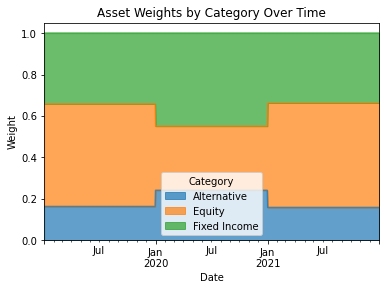

In [111]:
#Produce an area chart grouping asset weights by their categories, as detailed in the asset_information_data.csv.

# Melt weights_df to make it long-form for easier merging
weights_long = weights_df.reset_index().melt(id_vars='date', var_name='Name', value_name='Weight')

# Merge the weights with asset categories
merged_df = weights_long.merge(information_df, on='Name')

# Aggregate weights by category and date
category_weights = merged_df.groupby(['date', 'Family'])['Weight'].sum().unstack()

# Plot the area chart
plt.figure(figsize=(12, 8))
category_weights.plot.area(alpha=0.7)
plt.title('Asset Weights by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend(title='Category')
plt.show()